In [1]:
# opemm imports
import simtk.unit as u
import simtk.openmm as mm
import simtk.openmm.app as app

In [2]:
# ParmEd imports
from chemistry.charmm import  CharmmPsfFile
from chemistry.charmm.parameters import CharmmParameterSet

In [3]:
import TorsionScanSet, TorsionFitModel
from pymc import MCMC
from pymc.Matplot import plot

In [4]:
param = CharmmParameterSet('../charmm_ff/top_all36_cgenff.rtf', '../charmm_ff/par_all36_cgenff.prm')
stream = '../structures/Pyrrol/pyrrol.str'

model = TorsionFitModel.TorsionFitModel(param, stream, ['pyrrol'])
mcmc = MCMC(model)
sample = mcmc.sample(iter=10000, burn=1000, thin=10)



 [-----------------100%-----------------] 10000 of 10000 complete in 77.1 sec

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 440.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  460.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

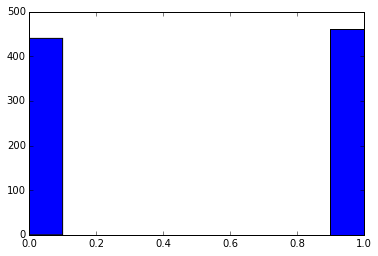

In [19]:
plt.hist(mcmc.trace('CG251O_NG3C51_CG2R51_CG2R51_1_Phase')[:])

(array([  87.,   91.,   92.,   75.,   92.,   75.,   99.,   97.,  107.,   85.]),
 array([  1.45455043e-02,   2.00830479e+00,   4.00206407e+00,
          5.99582336e+00,   7.98958264e+00,   9.98334193e+00,
          1.19771012e+01,   1.39708605e+01,   1.59646198e+01,
          1.79583791e+01,   1.99521383e+01]),
 <a list of 10 Patch objects>)

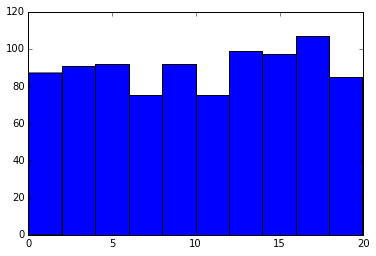

In [20]:
plt.hist(mcmc.trace('CG251O_NG3C51_CG2R51_CG2R51_1_K')[:])

(array([  80.,   72.,   90.,  109.,   77.,   86.,  107.,   72.,  101.,  106.]),
 array([  0. ,   6.3,  12.6,  18.9,  25.2,  31.5,  37.8,  44.1,  50.4,
         56.7,  63. ]),
 <a list of 10 Patch objects>)

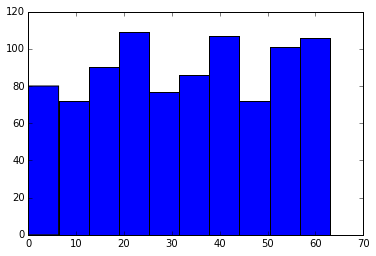

In [21]:
plt.hist(mcmc.trace('CG251O_NG3C51_CG2R51_CG2R51_multiplicity_bitstring')[:])

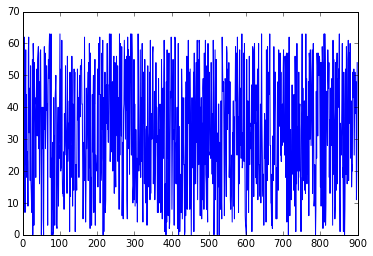

In [25]:
plt.plot(mcmc.trace('CG251O_NG3C51_CG2R51_CG2R51_multiplicity_bitstring')[:])

In [15]:
Cy3B_psf = CharmmPsfFile('../structures/Cy3B/Cy3B_2S_ChargeOpt.psf')
Cy3_psf = CharmmPsfFile('../structures/Cy3/Cy3_2S_OptCharges.psf')
pyrrol_psf = CharmmPsfFile('../structures/Pyrrol/pyrrol.psf')

In [17]:
Cy3B_pdb = app.PDBFile('../structures/Cy3B/Cy3B_2S_opt.pdb')
Cy3_pdb = app.PDBFile('../structures/Cy3/Cy3_2S_opt.pdb')
pyrrol_pdb = app.PDBFile('../structures/Pyrrol/pyrrol_opt.pdb')

In [18]:
integrator = mm.VerletIntegrator(0.004)
Cy3B_psf.load_parameters(param)
system_Cy3B = Cy3B_psf.createSystem()
sim_Cy3B = app.Simulation(Cy3B_pdb.topology, system_Cy3B, integrator)
sim_Cy3B.context.setPositions(Cy3B_pdb.positions)
state = sim_Cy3B.context.getState(getEnergy=True) 
print state.getPotentialEnergy()

107.162665301 kJ/mol


In [16]:
integrator = mm.VariableVerletIntegrator(0.004)
system_Cy3 = Cy3_psf.createSystem(param)
sim_Cy3 = app.Simulation(Cy3_pdb.topology, system_Cy3, integrator)
sim_Cy3.context.setPositions(Cy3_pdb.positions)
state = sim_Cy3.context.getState(getEnergy=True) 
print state.getPotentialEnergy()

2.55625424279 kJ/mol


In [17]:
integrator = mm.VariableVerletIntegrator(0.004)
system_pyrrol = pyrrol_psf.createSystem(param)
sim_pyrrol = app.Simulation(pyrrol_pdb.topology, system_pyrrol, integrator)
sim_pyrrol.context.setPositions(pyrrol_pdb.positions)
state = sim_pyrrol.context.getState(getEnergy=True) 
print state.getPotentialEnergy()

43.5396065748 kJ/mol
